In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the transposed CSV file into a DataFrame
file_path = '1_4.csv'  # Adjust the path to your CSV file
df = pd.read_csv(file_path, index_col=0)

# Step 2: Transpose the DataFrame to have classifiers as rows and metrics as columns
df = df.transpose()

# Step 3: Reset the index to have classifiers as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Classifier'}, inplace=True)

# Step 4: Display the transposed DataFrame
print("Transposed DataFrame:")
print(df)

# Step 5: Calculate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Transposed DataFrame:
Classifier                Classifier  Accuracy  F1-Score  Precision  Recall
0           best of M1 and M2 models     0.700     0.690      0.660   0.760
1                         HIVECOTEV2     0.672     0.660      0.669   0.672
2                              Hydra     0.678     0.667      0.677   0.678
3                        MultiRocket     0.681     0.679      0.682   0.681
4                   Proximity Forest       NaN       NaN        NaN     NaN
5                   Elastic Ensemble     0.578     0.577      0.586   0.578
6                       Fresh Prince     0.463     0.463      0.465   0.463
7                            TSFresh     0.616     0.613      0.614   0.616
8                              DrCIF     0.591     0.590      0.594   0.591
9                              rSTSF     0.637     0.634      0.636   0.637
10                              RDST     0.684     0.675      0.685   0.684
11                             MrSQM     0.596     0.595      0.59

In [2]:

# Step 6: Calculate the mean rank for each classifier based on all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df['Mean_Rank'] = df[metrics].mean(axis=1)
df = df.sort_values(by='F1-Score', ascending=False)


In [3]:

# Step 7: Display the ranked DataFrame
print("\nRanked DataFrame:")
print(df[['Classifier', 'F1-Score']])



Ranked DataFrame:
Classifier                Classifier  F1-Score
13                               TDE     0.745
0           best of M1 and M2 models     0.690
3                        MultiRocket     0.679
10                              RDST     0.675
16                          ridge_cv     0.672
2                              Hydra     0.667
1                         HIVECOTEV2     0.660
12                          Weasel-D     0.660
9                              rSTSF     0.634
7                            TSFresh     0.613
11                             MrSQM     0.595
8                              DrCIF     0.590
5                   Elastic Ensemble     0.577
6                       Fresh Prince     0.463
14                    Inception Time     0.158
4                   Proximity Forest       NaN
15                            ResNet       NaN


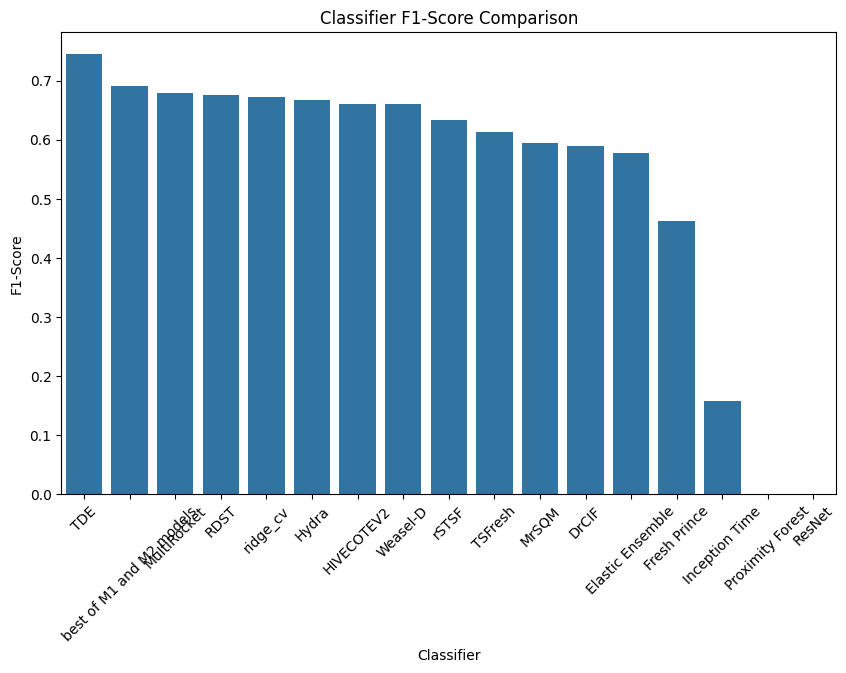

In [4]:

# Step 8: Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='F1-Score', data=df)
plt.xticks(rotation=45)
plt.title('Classifier F1-Score Comparison')
plt.show()


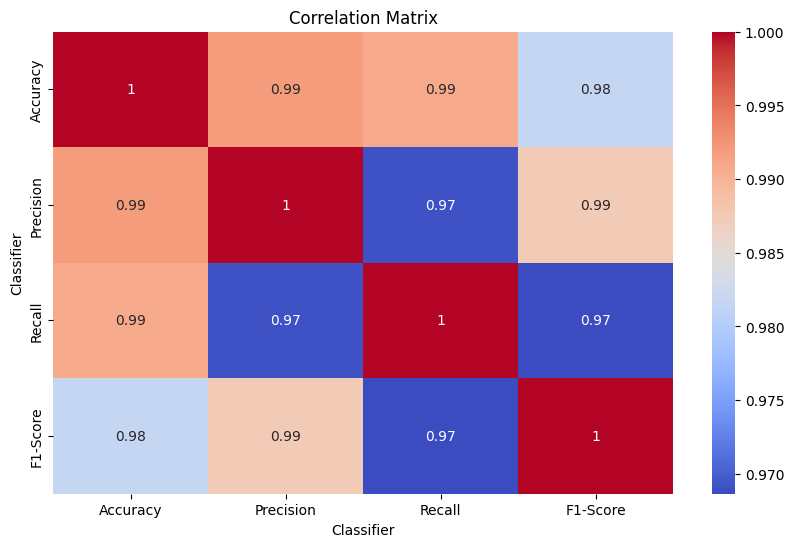

In [5]:

# Step 9: Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[metrics].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
